Visualize examples: display a few image-text pairs or QA items to assess image quality, text length, and modality alignment.

In [13]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [7]:
def create_dataframe_from_qa_json(json_name):
    data = pd.read_json('../OmniMedVQA/QA_information/Open-access/'+json_name)
    data['image_path'] = data['image_path'].apply(lambda x: '../OmniMedVQA/' + x)
    data['image'] = data['image_path'].apply(lambda x: Image.open(x))
    return data


In [ ]:
def show_qa_examples(df, index=[1,2,3]):
    option_cols = [col for col in df.columns if col.startswith('option_')]
    for i in index:
        row = df.iloc[i]
        img = row['image']
        question = row.get('question', 'N/A')
        gt_answer = row.get('gt_answer', 'N/A')
        modality = row.get('modality_type', 'N/A')

        options = []
        for col in sorted(option_cols):
            val = row.get(col, None)
            if pd.notnull(val):
                options.append(f"{col.replace('option_', '').upper()}: {val}")
        options_str = '\n'.join(options) if options else 'N/A'

        textstr = f"Question:\n{question}\n\nOptions:\n{options_str}\n\nGT Answer: {gt_answer}\nModality: {modality}"

        fig = plt.figure(figsize=(12, 6))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1.1, 1.3])
        ax_img = plt.subplot(gs[0])
        ax_txt = plt.subplot(gs[1])
        ax_img.imshow(img)
        ax_img.axis('off')
        ax_txt.axis('off')
        ax_txt.set_ylim(0, 1)
        ax_txt.text(0, 0.5, textstr, fontsize=12, va='center', ha='left', wrap=True)
        fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
        plt.show()


In [35]:
covid_df = create_dataframe_from_qa_json('Covid CT.json')

In [38]:
covid_df

,dataset,question_id,question_type,question,gt_answer,image_path,option_A,option_B,option_C,option_D,modality_type,image
0,Covid CT,Covid CT_0000,Modality Recognition,Which imaging technique was utilized to obtain...,CT.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/52%0...,Angiography,Bone scan,CT.,Thermography,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,Covid CT,Covid CT_0001,Modality Recognition,What type of imaging was employed to obtain th...,CT.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/18%0...,Angiography,MRI,PET scan,CT.,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,Covid CT,Covid CT_0002,Modality Recognition,What type of imaging technique was utilized to...,CT.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/71%1...,Bone scan,CT.,Angiography,X-ray,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,Covid CT,Covid CT_0003,Modality Recognition,What type of imaging was utilized to capture t...,CT.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/26%0...,CT.,Ultrasound,X-ray,Thermography,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,Covid CT,Covid CT_0004,Modality Recognition,Which imaging modality was utilized to obtain ...,CT.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/3.jpg,X-ray,Endoscopy,CT.,Ultrasound,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...,...,...,...,...,...,...,...,...,...,...
194,Covid CT,Covid CT_0194,Disease Diagnosis,Is there any abnormalities in this image?,No.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/1952...,No.,Yes,NaN,NaN,CT(Computed Tomography),<PIL.PngImagePlugin.PngImageFile image mode=RG...
195,Covid CT,Covid CT_0195,Disease Diagnosis,Is there anything abnormal in this image?,No.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/51%3...,Yes,No.,NaN,NaN,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...
196,Covid CT,Covid CT_0196,Disease Diagnosis,Are there any abnormalities present in this im...,No.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/1463...,No.,Yes,NaN,NaN,CT(Computed Tomography),<PIL.PngImagePlugin.PngImageFile image mode=RG...
197,Covid CT,Covid CT_0197,Disease Diagnosis,Is this image free from any abnormalities?,No.,../OmniMedVQA/Images/Covid CT/CT_NonCOVID/49%0...,Yes,No.,NaN,NaN,CT(Computed Tomography),<PIL.JpegImagePlugin.JpegImageFile image mode=...


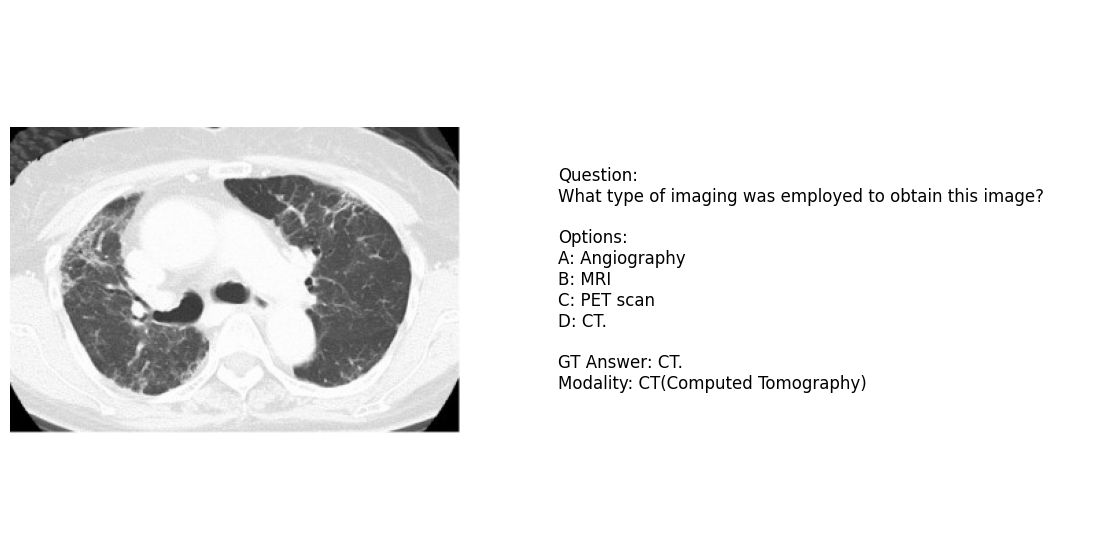

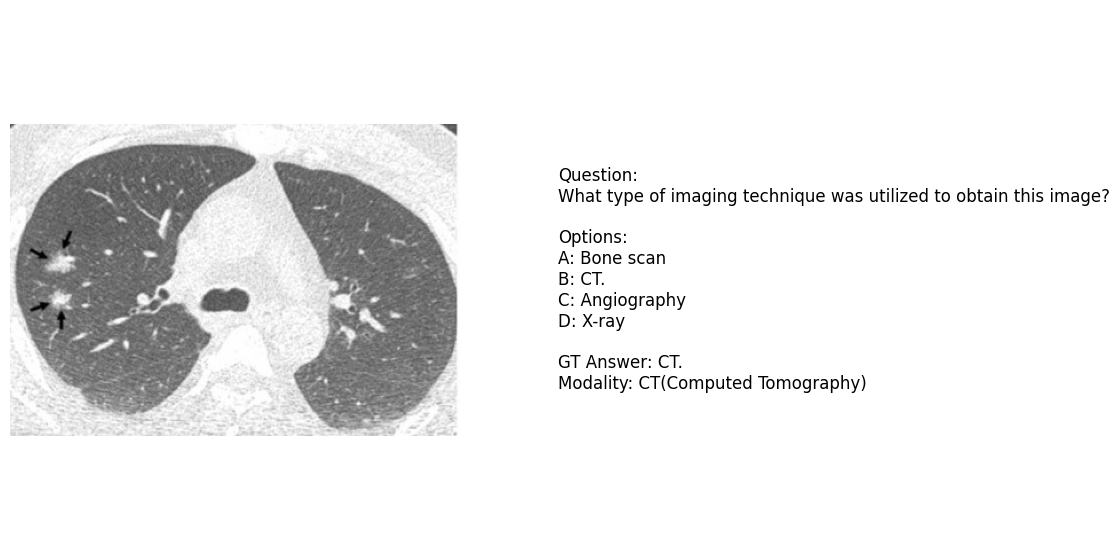

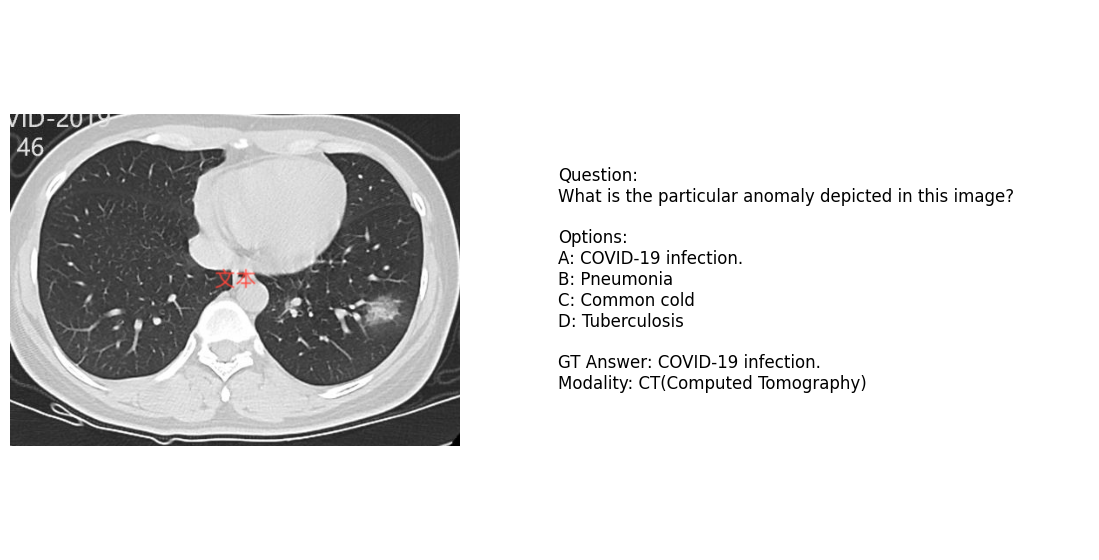

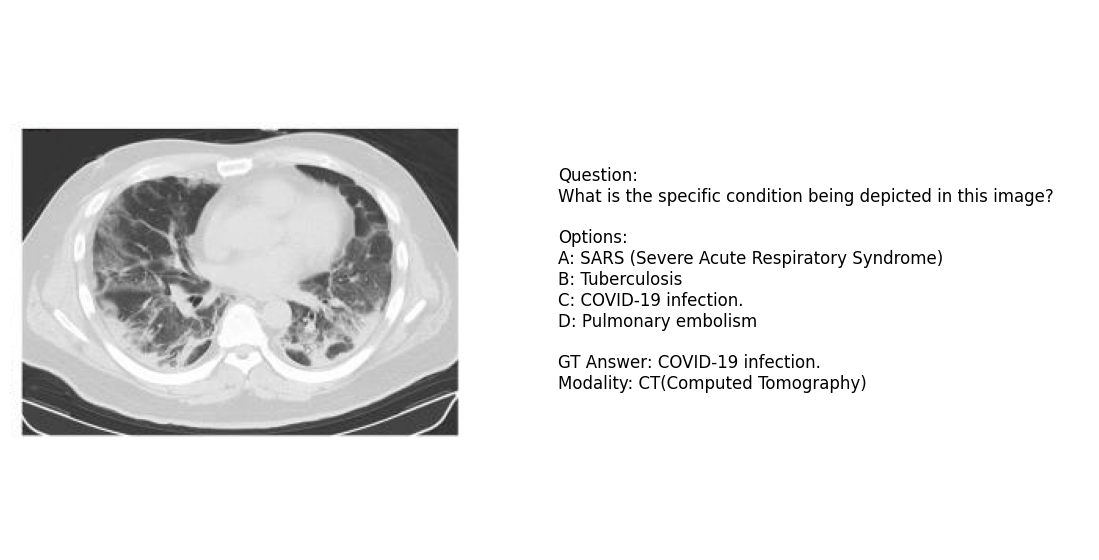

In [39]:
# Show the first 3 examples
show_qa_examples(covid_df, [1,2,120,121])

In [40]:
chest_df = create_dataframe_from_qa_json('Pulmonary Chest MC.json')

In [41]:
chest_df

,dataset,question_id,question_type,question,gt_answer,image_path,option_A,option_B,option_C,option_D,modality_type,image
0,Pulmonary Chest MC,Pulmonary Chest MC_0000,Modality Recognition,What modality is used to take this image?,X-ray,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,PET scan,X-ray,MRI,Ultrasound,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
1,Pulmonary Chest MC,Pulmonary Chest MC_0001,Modality Recognition,What is the imaging technique employed for cap...,X-ray,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Blood test,X-ray,PET scan,Ultrasound,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
2,Pulmonary Chest MC,Pulmonary Chest MC_0002,Modality Recognition,Which imaging technique is employed for captur...,X-ray,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,X-ray,MRI,PET scan,Blood test,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
3,Pulmonary Chest MC,Pulmonary Chest MC_0003,Modality Recognition,What type of imaging is used for capturing thi...,X-ray,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,PET scan,Blood test,X-ray,EKG,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
4,Pulmonary Chest MC,Pulmonary Chest MC_0004,Anatomy Identification,What content appears in this image?,Lung,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Liver,Muscle,Brain,Lung,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
5,Pulmonary Chest MC,Pulmonary Chest MC_0005,Anatomy Identification,What is the subject matter in this picture?,Lung,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Heart,Intestine,Lung,Stomach,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
6,Pulmonary Chest MC,Pulmonary Chest MC_0006,Anatomy Identification,What content appears in this image?,Lung,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Lung,Stomach,Kidney,Muscle,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
7,Pulmonary Chest MC,Pulmonary Chest MC_0007,Anatomy Identification,What content appears in this image?,Lung,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Lung,Muscle,Skin,Heart,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
8,Pulmonary Chest MC,Pulmonary Chest MC_0008,Anatomy Identification,What content appears in this image?,Lung,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Kidney,Liver,Skin,Lung,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...
9,Pulmonary Chest MC,Pulmonary Chest MC_0009,Anatomy Identification,What content appears in this image?,Lung,../OmniMedVQA/Images/Pulmonary Chest MC/MCUCXR...,Lung,Brain,Skin,Intestine,X-Ray,<PIL.PngImagePlugin.PngImageFile image mode=L ...


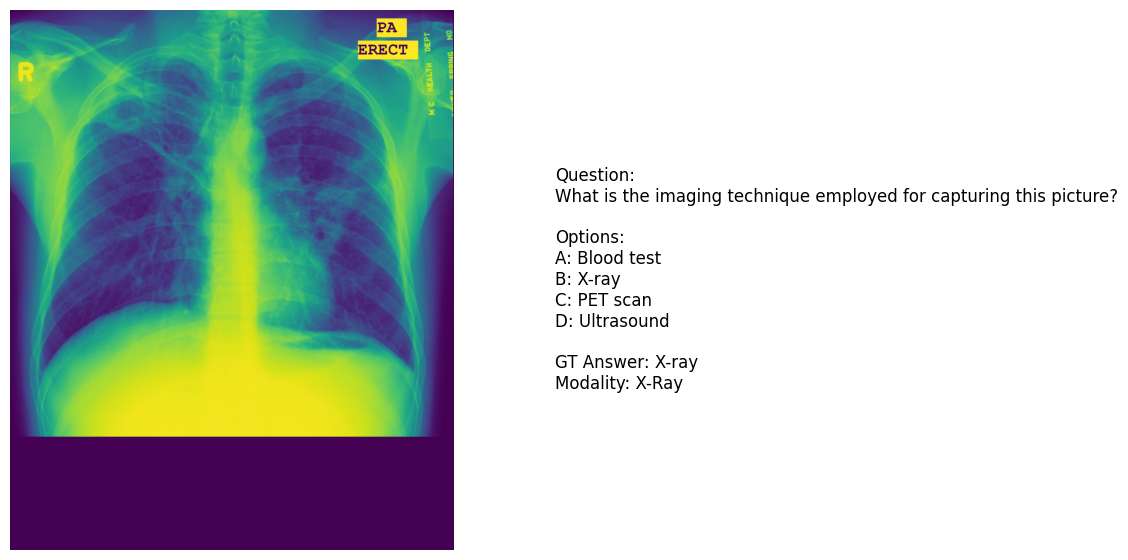

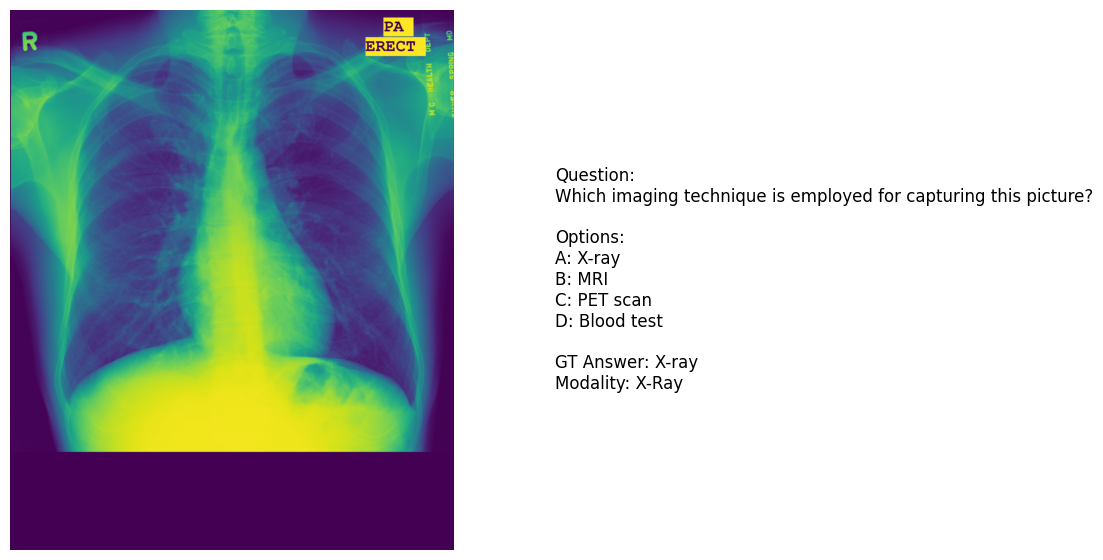

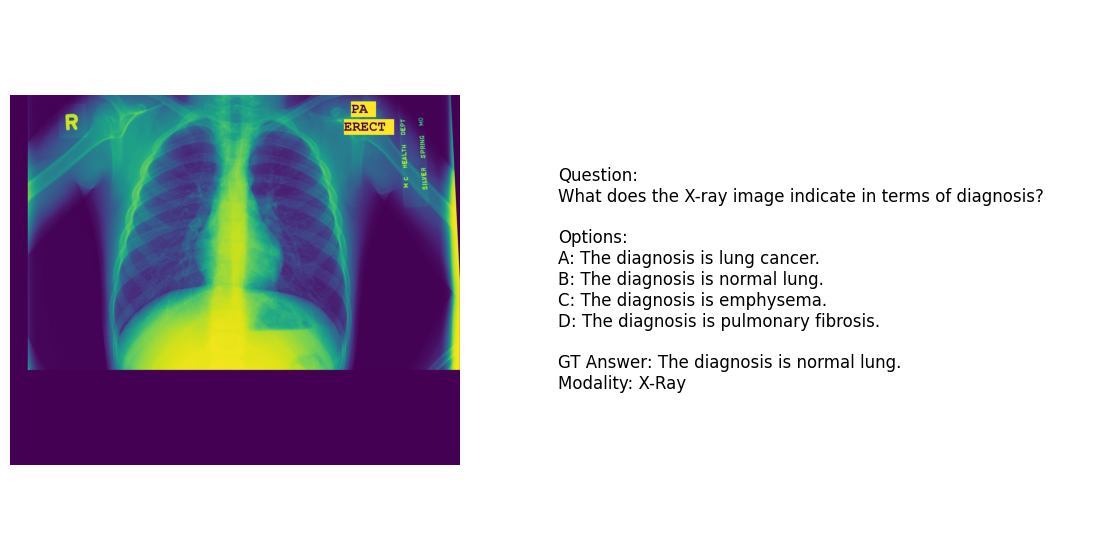

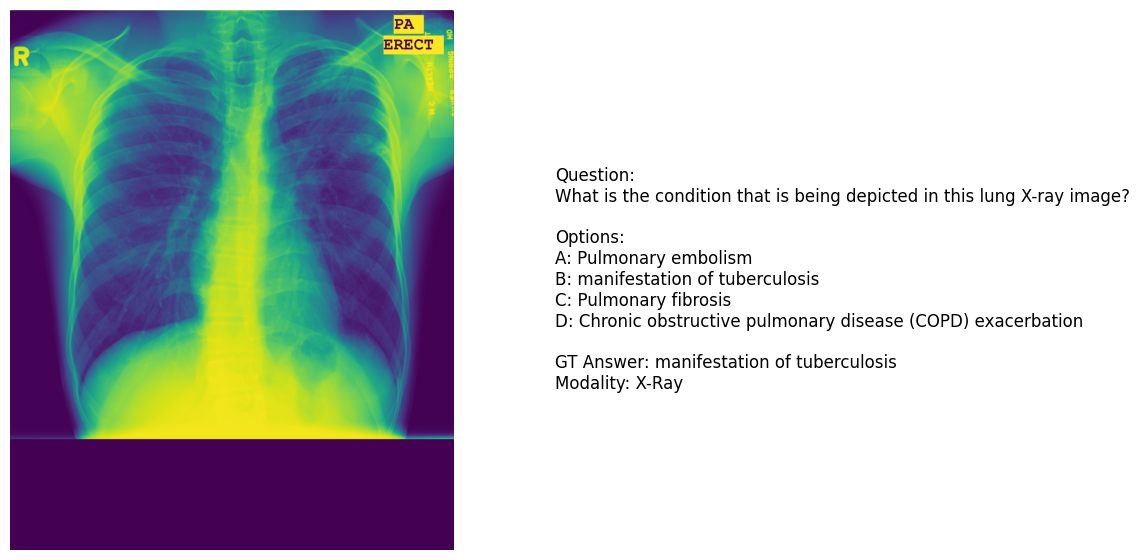

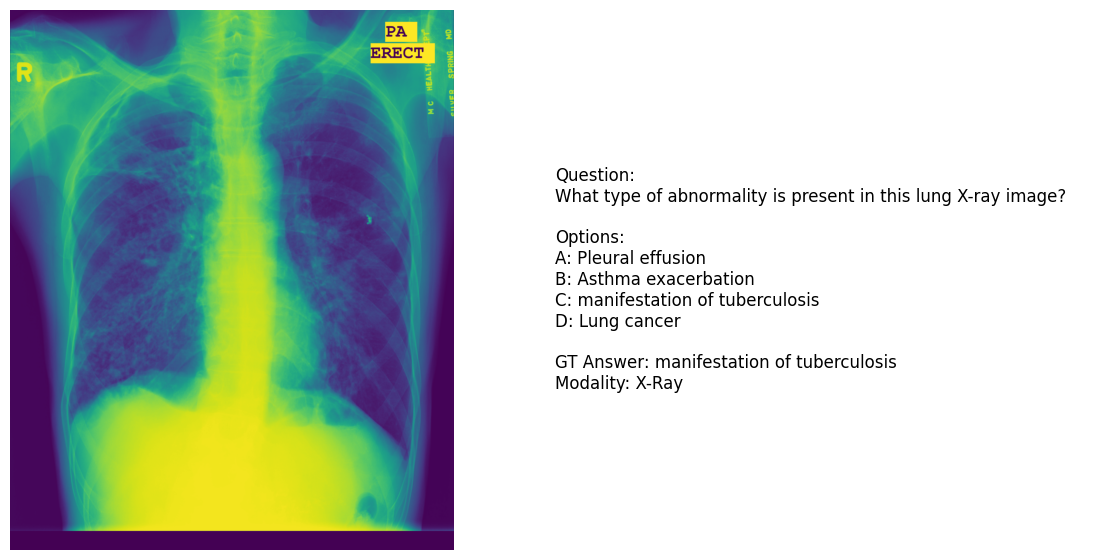

In [44]:
show_qa_examples(chest_df, [1,2,12,33,34])

In [48]:
blood_df = create_dataframe_from_qa_json('Blood Cell.json')

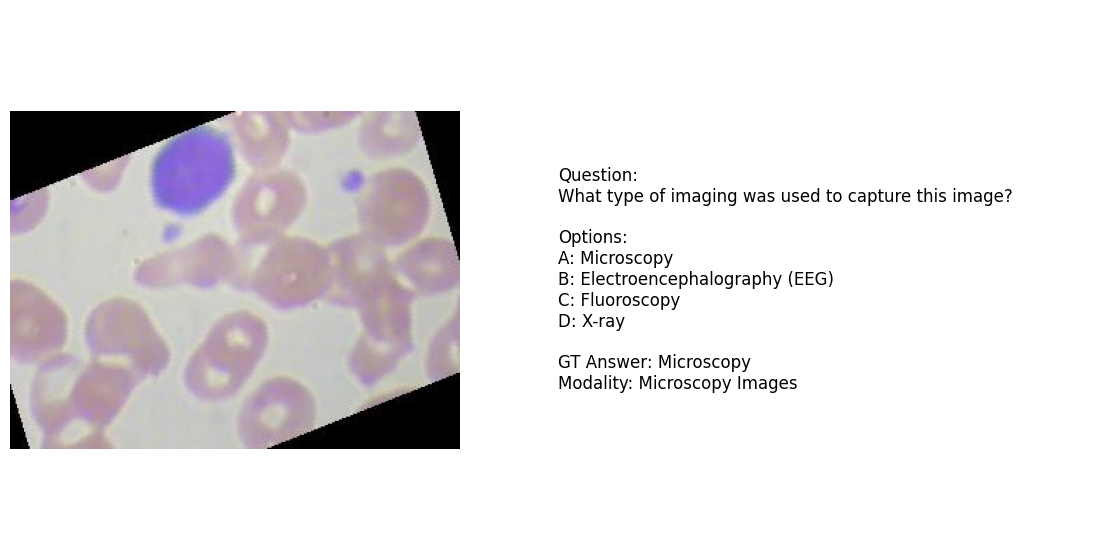

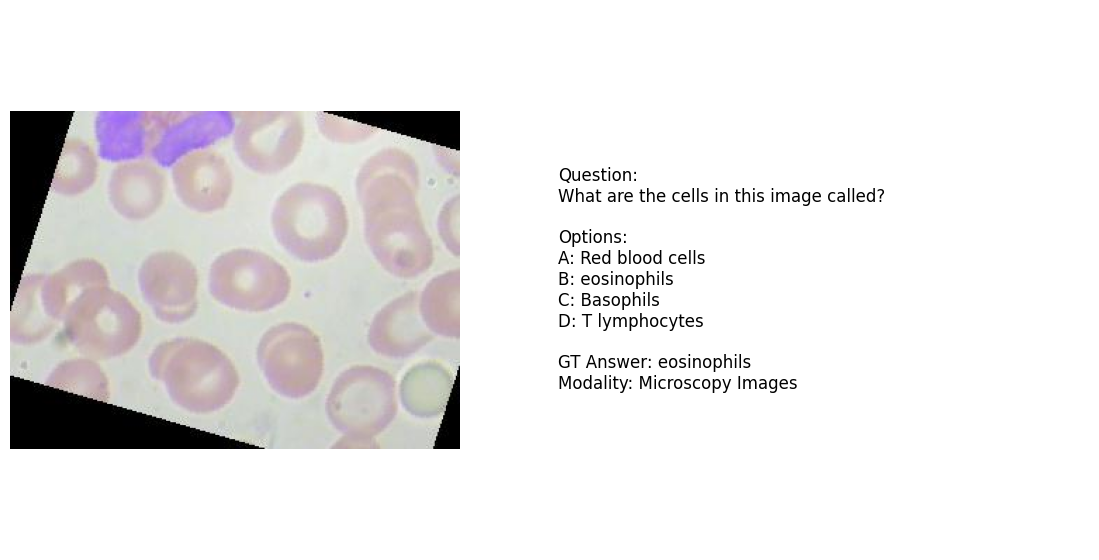

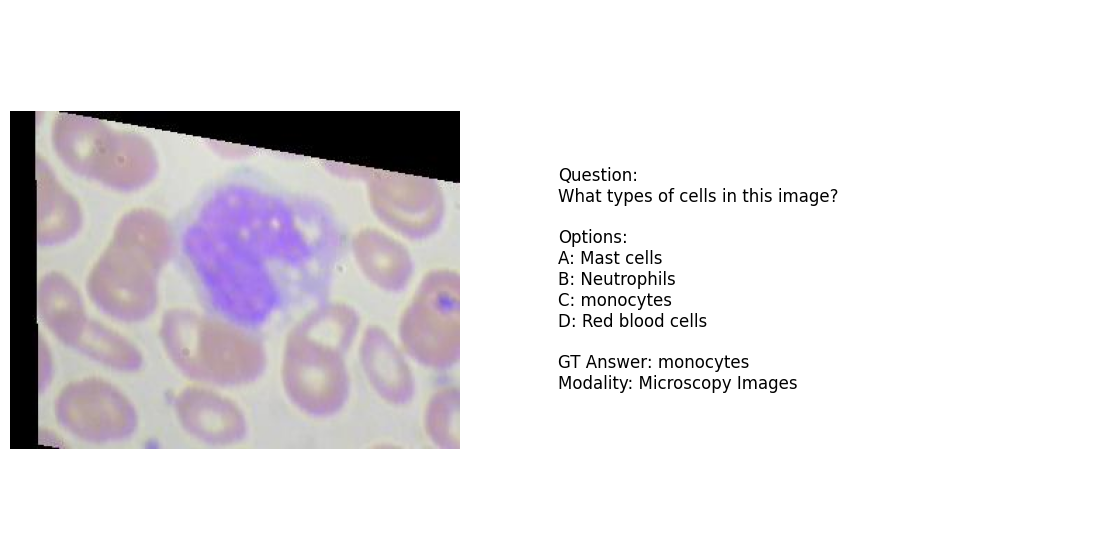

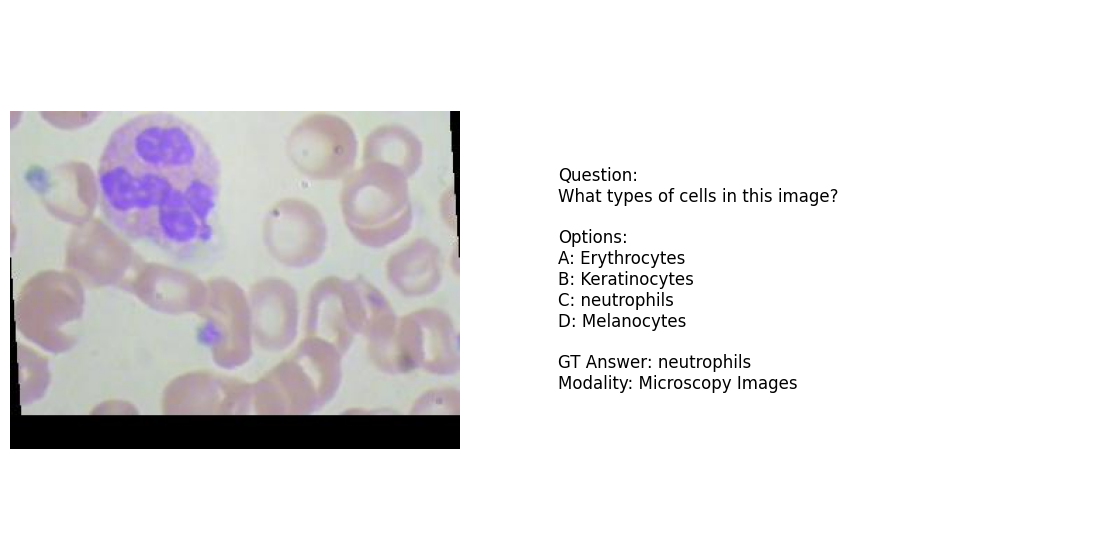

In [55]:
show_qa_examples(blood_df, [1,300,-300,-1])